# Research on rides in chicago
You're working as an analyst for Zuber, a new ride-sharing company that's launching in Chicago. Your task is to find patterns in the available information. You want to understand passenger preferences and the impact of external factors on rides.

Working with a database, you'll analyze data from competitors and test a hypothesis about the impact of weather on ride frequency.

# Step 1

- Import the files
- study the data
- make sure the data types are correct
- identify the top 10 neighborhoods in terms of drop-offs
- make graphs: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs
- draw conclusions based on each graph and explain the results

In [1]:
#import pandas and other important libraries
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

warnings.filterwarnings("ignore")

In [2]:
#read all input data and assign each dataset to a variable
try: 
    company_trips = pd.read_csv('project_sql_result_01.csv')
except:
    company_trips = pd.read_csv('/datasets/project_sql_result_01.csv')
    
try:
    dropoff_trips = pd.read_csv('project_sql_result_04.csv')
except:
    dropoff_trips = pd.read_csv('/datasets/project_sql_result_04.csv')

In [3]:
company_trips.info()
company_trips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


Datatypes look fine for company_trips

In [4]:
dropoff_trips.info()
dropoff_trips

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


Datatypes looks like it needs changing. Convert average trips to integer

In [5]:
dropoff_trips['average_trips'] = dropoff_trips['average_trips'].astype('int')
dropoff_trips.info()

#sorting from most popular and saving top 10 dropoff
top_ten_dropoff = dropoff_trips.sort_values('average_trips', ascending=False).head(10)
top_ten_dropoff

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9523
2,Streeterville,6664
3,West Loop,5163
4,O'Hare,2546
5,Lake View,2420
6,Grant Park,2068
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1259


Text(0, 0.5, 'Number of average trips')

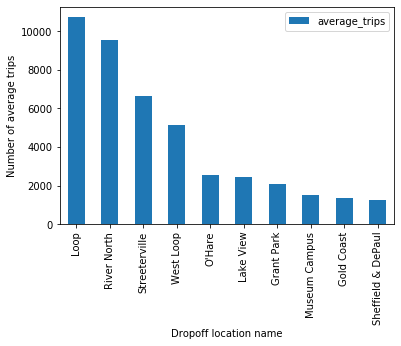

In [6]:
top_ten_dropoff.set_index("dropoff_location_name",drop=True,inplace=True)

top_ten_dropoff.plot(kind='bar')
plt.xlabel('Dropoff location name')
plt.ylabel('Number of average trips')

# Findings from the graph
As we can see, Loop is the most popular location, followed by River North, and so on. There seems to be a steep drop from West Loop to O'Hare, and plateaus from there.

Text(0, 0.5, 'Number of trips')

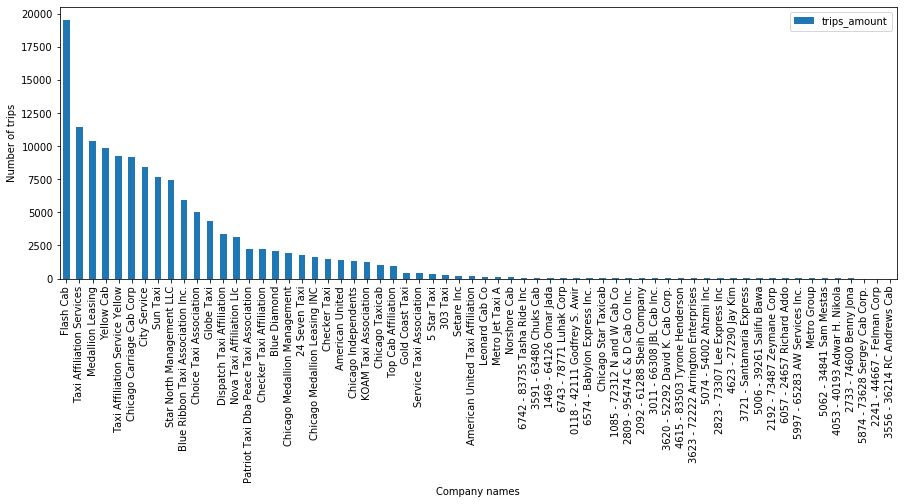

In [18]:
company_trips.plot(kind='bar', linewidth = 20, figsize=(15,5))
plt.xlabel('Company names')
plt.ylabel('Number of trips')


Text(0, 0.5, 'Number of trips')

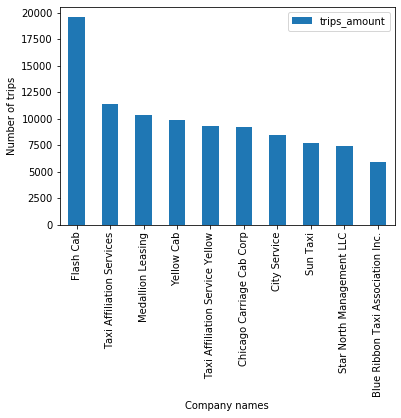

In [120]:
top_ten_companies = company_trips.sort_values('trips_amount', ascending=False).head(10)
top_ten_companies.plot(kind='bar')
plt.xlabel('Company names')
plt.ylabel('Number of trips')

# Findings from the graphs
While the initial graph is hard to see, on the second graph we can see that the company Flash Cab has a vast lead from the other companies.

# Conclusion from all graphs
Judging by locations, we can see that the Loop and River North are the most popular dropoff locations from taxis. Looking at the company graphs, we can see that Flash Cab has a clear lead from the other companies with a steep difference of 8136 trips from Flash Cab to Taxi Affiliation Services. 

# Step 2

 - Test the hypothesis:
    "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."
 - Decide where to set the significance level (alpha)
 - Explain how you formed the null and alternative hypotheses
 - Explain what criterion you used to test the hypotheses and why

In [121]:
#read new input data and assign the dataset to a variable
try: 
    ride_data = pd.read_csv('project_sql_result_07')
except:
    ride_data = pd.read_csv('/datasets/project_sql_result_07.csv')

In [122]:
#checking info, may need to convert datetime
ride_data.info()
ride_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [123]:
#converting to datetime and changing duration_seconds to int
ride_data['start_ts'] = pd.to_datetime(ride_data['start_ts'], format='%Y-%m-%dT%H:%M:%S')
ride_data['duration_seconds'] = ride_data['duration_seconds'].astype('int')
ride_data.info()
ride_data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null datetime64[ns]
weather_conditions    1068 non-null object
duration_seconds      1068 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410
1,2017-11-25 14:00:00,Good,1920
2,2017-11-25 12:00:00,Good,1543
3,2017-11-04 10:00:00,Good,2512
4,2017-11-11 07:00:00,Good,1440
...,...,...,...
1063,2017-11-25 11:00:00,Good,0
1064,2017-11-11 10:00:00,Good,1318
1065,2017-11-11 13:00:00,Good,2100
1066,2017-11-11 08:00:00,Good,1380


# Null hypothesis

The null hypothesis:
 - H0 is to see if the average duration of rides from the Loop to O'Hare International Airport STAYS the same on rainy Saturdays
 - H1 is to see if the average duration of rides from the Loop to O'Hare International Airport CHANGES on rainy Saturdays

In [124]:
#get rows with bad weather and rows with good weather while query on a saturday
rainy_data = ride_data.query('weather_conditions == "Bad" & start_ts.dt.day_name() == "Saturday"')
non_rainy_data = ride_data.query('weather_conditions == "Good" & start_ts.dt.day_name() == "Saturday"')

alpha = 0.05

result = st.ttest_ind(rainy_data['duration_seconds'], non_rainy_data['duration_seconds'], equal_var = True)

print('p-value:', result.pvalue)

if (result.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We cannot reject the null hypothesis")

p-value: 6.517970327099473e-12
We reject the null hypothesis


# Conclusion and explanation

I set the alpha at 0.05 because the majority of the data will be in the 95 percent, and it's just a basic standard that will work well for these type of tests.

CONCLUSION FROM THIS TEST

    The means are statistically different with a significance alpha value of 0.5, therefore We REJECT the NULL HYPOTHESIS 

# Final conclusion

In terms of what companies are successful, Flash cab is vastly far ahead from the competition. Having a difference of 8,136 rides in only one day compared to the second top company, Taxi affiliation Services. In terms of popular drop off places, the Loop and River North are most popular, follwed by other locations not too far behind. 

From the null hypotheses that I have tested, we reject the null hypotheses that the average duration of rides from the Loop to O'Hare International Airport stays the same on rainy Saturdays. From this, we can conclude that there is a difference between rainy days on a saturday. 